## Project 1 - Take Away & My behavior Analysis
Online Takeaway is indispensable in my daily life, I wonder the frequency of my takeaway ordering in 2020 and the corresponding consequence. It's pretty hard for me to trace back all my online ordering in my head, thus I collect my bank transaction details to proceed it.<br>
For 2020, I residents in Australia and use the Australian CommonWealth Bank(CBA) as my only bank, and I use 3 online takeaway websites in total:
- Hungry Panda (in Chinese)
- Easi Takeaway (in Chinese)
- Uber Eats (in English)

### Part 1: My 2020 takeaway data

I download my transaction details from CommonWealth Netbank as a csv file, it has 4 columns:
- Date
- Amount (for Debit)
- Details (for transfer description)
- Balance

I import then in MS Excel first since we need to do some basic data processing:

- Drop Balance Attribute because it is not useful in this project
- Select transactions that are relevant to my take away behavior: I use __filter__ in excel to extract transactions that contains words "hungryPanda", "Easi", and "Uber Eats"

We got a processed csv file and save is as "takeaway.csv"

In [1]:
import pandas as pd
data = pd.read_csv("takeAway.csv")
data.head()

,Date,Amount,Details
0,01/04/2020,-38.57,PIN*585 HungryPanda PRAHRAN VI AUS Card xx6271...
1,01/07/2020,-31.46,PIN*479 HungryPanda PRAHRAN VI AUS Card xx6271...
2,01/07/2020,-42.22,PIN*401 HungryPanda PRAHRAN VI AUS Card xx6271...
3,01/08/2020,-19.49,UBER *EATS Sydney AU AUS Card xx6271 Value Dat...
4,01/09/2020,-19.99,UBER *EATS Sydney AU AUS Card xx6271 Value Dat...


Advanced data preprocessing are also necessary, since I want to divied my takeaway data into weekly behaviour, thus I have to transfer the Attribute "Date" into the week, for example: 01/01/2020 means the first week of 2020, so week = 1, 01/09/2020 means second week thus week = 2.

In [2]:
from datetime import date
def dateToWeek(x):
    day = int(x[:2])
    month = int(x[3:5])
    year = int(x[6:])
    dt = date(year, month, day)
    week = dt.strftime("%V")
    return int(week)

In [3]:
data["week"] = data["Date"].apply(lambda x: dateToWeek(x))
drop_list = ['Date']
data.drop(drop_list, inplace = True, axis=1)

In [4]:
data.head()

,Amount,Details,week
0,-38.57,PIN*585 HungryPanda PRAHRAN VI AUS Card xx6271...,14
1,-31.46,PIN*479 HungryPanda PRAHRAN VI AUS Card xx6271...,27
2,-42.22,PIN*401 HungryPanda PRAHRAN VI AUS Card xx6271...,27
3,-19.49,UBER *EATS Sydney AU AUS Card xx6271 Value Dat...,31
4,-19.99,UBER *EATS Sydney AU AUS Card xx6271 Value Dat...,36


### Part 2: Visualization of Takeaway Data
- How many orders I placed weekly in whole 2020 ?
- How much I weekly spend on takeaway in 2020 ?

In [5]:
# got x = week, y = orders
weekly_order = data.groupby("week")["Details"].count()
x = weekly_order.index
y1 = weekly_order.values # number of orders

In [6]:
# got x = week, y = amount
weekly_amount = data.groupby("week")["Amount"].sum()
y2 = [-1*a for a in weekly_amount.values]

[Text(0.5, 0, 'week'), Text(0, 0.5, 'Au Dollars')]

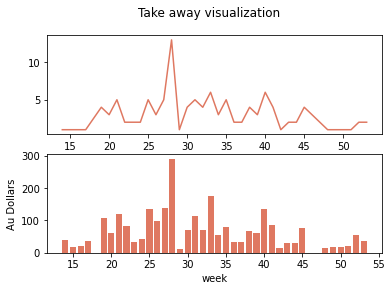

In [12]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle("Take away visualization")
axs[0].plot(x,y1, color = "#df7861")
axs[1].bar(x,y2, color = "#df7861")
axs[1].set(xlabel='week', ylabel='Au Dollars')


From the line plot and bar plot we found that:
- From week 1 to week 13 I didn't order any online takeaway 
- In week 28, I ordered 13 times in one week, that is to say, I almost ordered all meals (Only have 2 per day) through online takeaway and it cost me almost 300 Au dollars
- From week 20 to 40, that is, from May 11 to Sep 28, I ordered online very frequently
- At the end of 2020, frequency was reduced

How it happens? (Rough Analysis)
- Covid-19 start to widely spread in Australia (NSW Sydney) from March 2020, and before that, I used to eat out at the resturant with friends, thus I did not have requirements for online ordering
- Due to thr outbreak of Covid-19, I have to stay at home more time, so from week 13, I start to use online delivery.
- In April, I moved to a new aparment far away from market and resturant, and covid became stronger, the count of online ordering rocktes.
- In week 28, I went through a hardest final exam and always feel stressed, so I totally gave up cooking at home.